In [1]:
import json 
import csv
import pandas as pd
import numpy as np 
import scipy 
import scipy.stats as stats
from scipy.stats import sem 
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


### Load Target at Center Raw Individual Trial Data

In [2]:
TAC_normalized_individual_trial_data_path  = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/matchedVE/normalized/'

# x data
with open(TAC_normalized_individual_trial_data_path + 'n_X_250.npy' , 'rb') as f:
    TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_normalized_individual_trial_data_path + 'n_X_1000.npy' , 'rb') as f:
    TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_normalized_individual_trial_data_path + 'n_final_y_250.npy' , 'rb') as f:
    TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_normalized_individual_trial_data_path + 'n_final_y_1000.npy' , 'rb') as f:
    TAC_final_y_1000= np.load(f, allow_pickle=True)

with open(TAC_normalized_individual_trial_data_path + 'n_ste_250.npy', 'rb') as f:
    TAC_final_ste_250 = np.load(f, allow_pickle=True)
    
with open(TAC_normalized_individual_trial_data_path + 'n_ste_1000.npy', 'rb') as f:
    TAC_final_ste_1000 = np.load(f, allow_pickle=True)
    
with open(TAC_normalized_individual_trial_data_path + 'n_final_stim_250.npy', 'rb') as f:
    TAC_final_stim_250 = np.load(f, allow_pickle=True)
    
with open(TAC_normalized_individual_trial_data_path + 'n_final_stim_1000.npy', 'rb') as f:
    TAC_final_stim_1000 = np.load(f, allow_pickle=True)

In [3]:
raw_250_data = pd.read_csv('/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_data/matched/raw_250_data.csv')
raw_1000_data = pd.read_csv('/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_data/matched/raw_1000_data.csv')


In [4]:
np.mean(np.array(raw_1000_data['depth_estimate']))

2.614507780805329

In [5]:
transf_y_250 = TAC_final_y_250 * np.mean(np.array(raw_250_data['depth_estimate']))
transf_ste_250 = TAC_final_ste_250 * np.mean(np.array(raw_250_data['depth_estimate']))

In [6]:
transf_y_1000 = TAC_final_y_1000 * np.mean(np.array(raw_1000_data['depth_estimate']))
transf_ste_1000 = TAC_final_ste_1000 * np.mean(np.array(raw_1000_data['depth_estimate']))

In [7]:
# function to convert to superscript
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)
  
# display superscipt
print('test' + get_super('GeeksforGeeks')) #ᴳᵉᵉᵏˢᶠᵒʳᴳᵉᵉᵏˢ

testᴳᵉᵉᵏˢᶠᵒʳᴳᵉᵉᵏˢ


## Normed and Transformed

In [8]:
# remove stimuli with bad kinect tagging 

TAC_X_250 = np.delete(TAC_X_250, 109)
transf_y_250 = np.delete(transf_y_250, 109)
transf_ste_250 = np.delete(transf_ste_250, 109)
TAC_final_stim_250 = np.delete(TAC_final_stim_250, 109)
TAC_final_ste_250 = np.delete(TAC_final_ste_250, 109)

m: [0.53815095]
b: 0.5585254205068872
R-squared:  0.7292150393439657


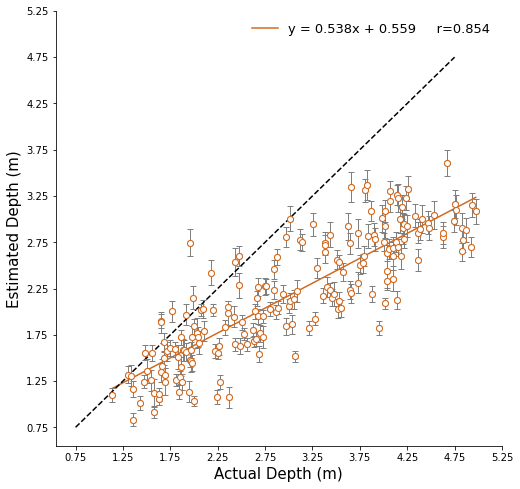

In [9]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[8,8])

right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_250 = np.array(TAC_X_250).reshape(-1,1)
y_250 = transf_y_250
reg_250 = LinearRegression().fit(X_250, y_250)

#Generated Predictions
y_predicted_250 = reg_250.predict(X_250)

#Plot Our Actual and Predicted Values
plt.plot(X_250, y_250, 'o', color='chocolate', alpha = 0.7);

r = np.sqrt(reg_250.score(X_250, y_250))

plt.plot(X_250,y_predicted_250,color='chocolate', label = 'y = ' + str(round(reg_250.coef_[0], 3)) + 'x + ' +  str(round(reg_250.intercept_, 3))
         + '     r' + '=' +  str(round(float(r), 3)))

plt.xlabel("Actual Depth (m)", fontsize = 15)
plt.ylabel("Estimated Depth (m)", fontsize = 15)
x_perfacc = np.arange(0.75,5.75, 1)
plt.plot(x_perfacc, x_perfacc, color = 'black',linestyle='--')  # solid
plt.errorbar(X_250, y_250, yerr=transf_ste_250, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "white", mec = "chocolate", capsize = 3)

# plt.plot(X_250[134], y_250[134], 'o', color='blue')

legend = plt.legend(loc = 0, fontsize = 13, labelspacing = 1, frameon=False)

plt.xticks(np.arange(0.75,5.75, 0.5))
plt.yticks(np.arange(0.75,5.75, 0.5))

#get coefficients and y intercept
print("m: {0}".format(reg_250.coef_))
print("b: {0}".format(reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_250.score(X_250, y_250))



In [10]:
TAC_final_stim_250[157], X_250[157], y_250[157]

('depth_duration_stimuli/001447_2014-06-19_17-00-32_260595134347_rgbf000082-resize_5/001447_2014-06-19_17-00-32_260595134347_rgbf000082-resize_5-target.png',
 array([4.13775]),
 2.125567646922593)

In [11]:
TAC_final_stim_250[134], X_250[134], y_250[134]

('depth_duration_stimuli/000191_2014-05-12_17-07-38_260595134347_rgbf000199-resize_0/000191_2014-05-12_17-07-38_260595134347_rgbf000199-resize_0-target.png',
 array([3.7995]),
 3.3099468034969406)

In [12]:
# remove stimuli with bad kinect tagging 

TAC_X_1000 = np.delete(TAC_X_1000, 109)
transf_y_1000 = np.delete(transf_y_1000, 109)
transf_ste_1000 = np.delete(transf_ste_1000, 109)
TAC_final_stim_1000 = np.delete(TAC_final_stim_1000, 109)
TAC_final_ste_1000 = np.delete(TAC_final_ste_1000, 109)

m: [0.65987034]
b: 0.6362314533645639
R-squared:  0.7481166975712348


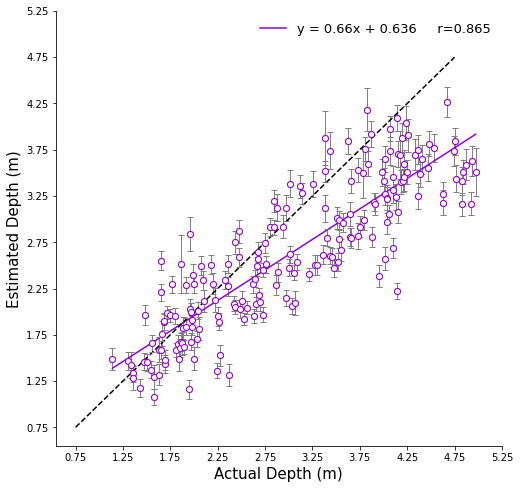

In [13]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[8,8])

right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_1000 = np.array(TAC_X_1000).reshape(-1,1)
y_1000 = transf_y_1000
reg_1000 = LinearRegression().fit(X_1000, y_1000)

#Generated Predictions
y_predicted_1000 = reg_1000.predict(X_1000)
#Plot Our Actual and Predicted Values
plt.plot(X_1000, y_1000, 'o', color='darkviolet', alpha = 0.7);
# plt.plot(X_1000,y_predicted_1000,color='darkviolet', label = 'y = ' + str(round(reg_1000.coef_[0], 3)) + 'x + ' +  str(round(reg_1000.intercept_, 3))
#          + '     r' + get_super('2') + '=' +  str(round(float(reg_1000.score(X_1000, y_1000)), 3)))

r = np.sqrt(reg_1000.score(X_1000, y_1000))

plt.plot(X_1000,y_predicted_1000,color='darkviolet', label = 'y = ' + str(round(reg_1000.coef_[0], 3)) + 'x + ' +  str(round(reg_1000.intercept_, 3))
         + '     r' + '=' +  str(round(float(r), 3)))

# plt.title("1000 ms: Verbal Judgement", fontsize = 20)
plt.xlabel("Actual Depth (m)", fontsize = 15)
plt.ylabel("Estimated Depth (m)", fontsize = 15)
x_perfacc = np.arange(0.75,5.75, 1)
plt.plot(x_perfacc, x_perfacc, color = 'black',linestyle='--')  # solid
plt.errorbar(X_1000, y_1000, yerr=transf_ste_1000, elinewidth = 1, ecolor = "gray", fmt = 'or', mfc = "white", mec = "darkviolet", capsize = 3)


legend = plt.legend(loc = 0, fontsize = 13, labelspacing = 1, frameon=False)

plt.xticks(np.arange(0.75,5.75, 0.5))
plt.yticks(np.arange(0.75,5.75, 0.5))

#get coefficients and y intercept
print("m: {0}".format(reg_1000.coef_))
print("b: {0}".format(reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_1000.score(X_1000, y_1000))

In [14]:
for actualDepth in X_1000:
    if 3.75 < actualDepth < 4.25:
        i = list(X_1000).index(actualDepth)        
        if y_1000[i] < 2.3:
            print(i, actualDepth, X_1000[i], y_1000[i])
            print(TAC_final_stim_1000[i])

157 [4.13775] [4.13775] 2.219631131632284
depth_duration_stimuli/001447_2014-06-19_17-00-32_260595134347_rgbf000082-resize_5/001447_2014-06-19_17-00-32_260595134347_rgbf000082-resize_5-target.png


In [15]:
for actualDepth in X_1000:
    if 3.75 < actualDepth < 4:
        i = list(X_1000).index(actualDepth)
        if 3.75 < y_1000[i] < 4:
            print(i, actualDepth, X_1000[i], y_1000[i])
            print(TAC_final_stim_1000[i])


134 [3.7995] [3.7995] 3.7588981007555424
depth_duration_stimuli/000191_2014-05-12_17-07-38_260595134347_rgbf000199-resize_0/000191_2014-05-12_17-07-38_260595134347_rgbf000199-resize_0-target.png
137 [3.8715] [3.8715] 3.922171384433819
depth_duration_stimuli/000009_2014-05-26_14-32-05_260595134347_rgbf000034-resize_3/000009_2014-05-26_14-32-05_260595134347_rgbf000034-resize_3-target.png


In [11]:
import sys
!{sys.executable} -m pip install shapely